In [3]:
import pandas as pd

In [4]:
dados = pd.read_csv('aluguel.csv', delimiter= ';')
dados.head(10)

dados.shape
dados.columns
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [5]:
dados['Tipo']
dados[['Quartos', 'Valor']]

dados.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [6]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [7]:
dados['Valor'].mean()

12952.659715265761

In [8]:
dados.groupby('Tipo').mean(numeric_only=True)
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


<Axes: ylabel='Tipo'>

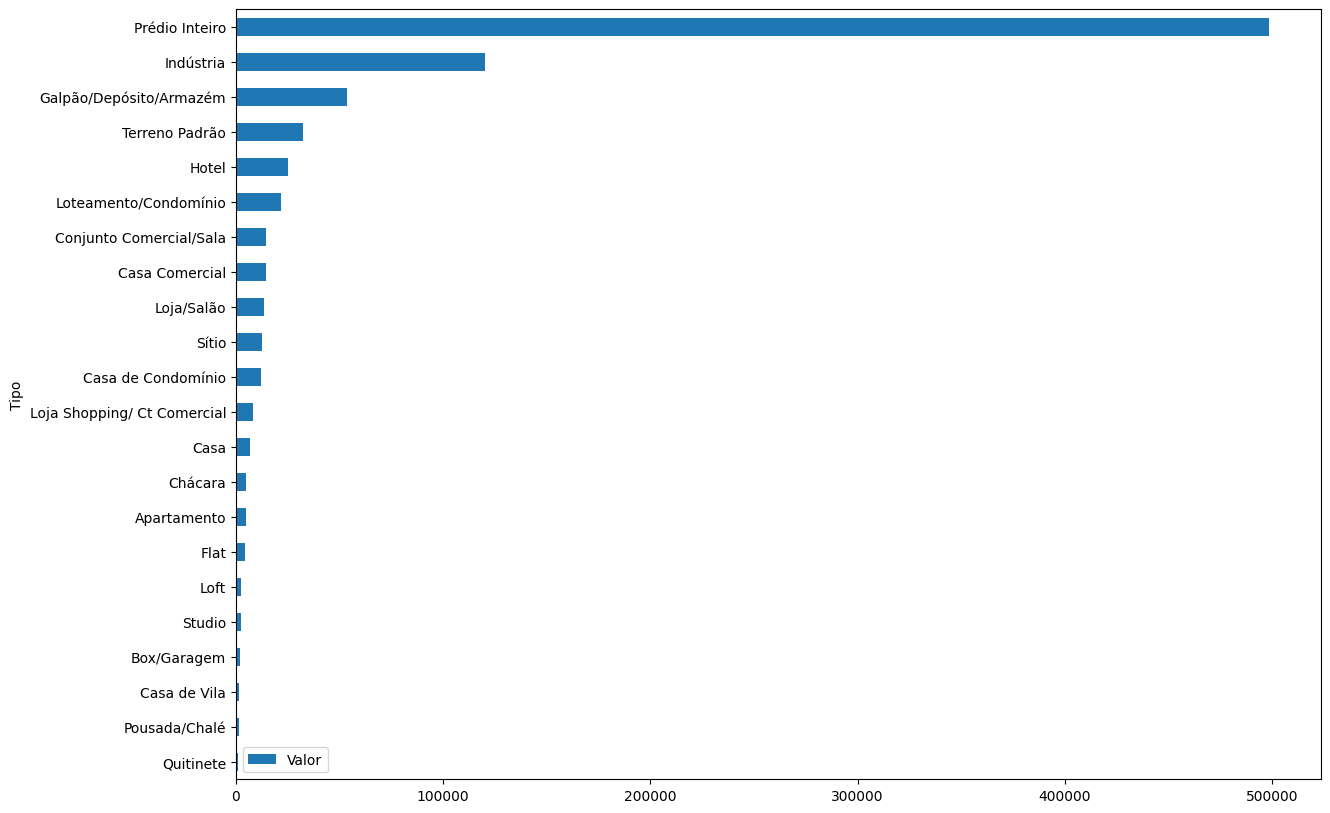

In [9]:
df_preco_tipo = dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

df_preco_tipo.plot(kind='barh', figsize=(14, 10))

In [10]:
df = pd.DataFrame({
    'Animal': ['Gato', 'Cachorro', 'Cachorro', 'Calopsita', 'Hamster', 'Hamster'],
    'Cor': ['Preto', 'Caramelo', 'Rajado', 'Branco', 'Marrom', 'Preto'],
    'Quantidade': [2, 1, 3, 2, 2, 1]
})

#display(df)

df.groupby('Animal')[['Quantidade']].sum()

,Quantidade
Animal,
Cachorro,4
Calopsita,2
Gato,2
Hamster,3


In [11]:
df.groupby(['Animal', 'Cor'])[['Quantidade']].sum()

Quantidade
Animal    Cor                 
Cachorro  Caramelo           1
          Rajado             3
Calopsita Branco             2
Gato      Preto              2
Hamster   Marrom             2
          Preto              1

In [12]:
# Removendo os imóveis comerciais

# dados.Tipo.unique()

imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém', 'Casa Comercial',
                      'Terreno Padrão','Loja Shopping/ Ct Comercial', 
                      'Box/Garagem', 'Chácara', 
                      'Loteamento/Condomínio','Sítio', 
                      'Pousada/Chalé', 'Hotel', 'Indústria']

df = dados.query('@imoveis_comerciais not in Tipo')
df.head()

df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

<Axes: ylabel='Tipo'>

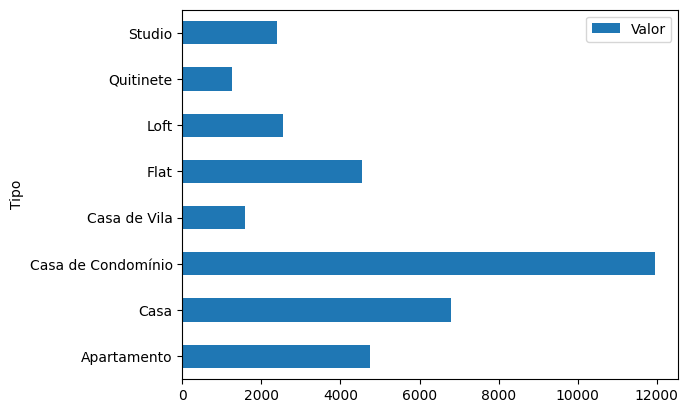

In [13]:
df.groupby('Tipo')[['Valor']].mean().plot(kind='barh')

In [14]:
display(df)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [15]:
# Qual o percentual de cada tipo de imóvel na nossa base de dados?

df.Tipo.value_counts(normalize=True)

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64

In [16]:
df_percentual_tipo = df.Tipo.value_counts(normalize=True).to_frame().sort_values('proportion')

df_percentual_tipo.rename(columns={'proportion': 'Percentuais'}, inplace=True)

display(df_percentual_tipo)

,Percentuais
Tipo,
Studio,0.000173
Loft,0.002207
Casa de Vila,0.010774
Flat,0.020596
Quitinete,0.036173
Casa,0.041842
Casa de Condomínio,0.043096
Apartamento,0.845139


<Axes: xlabel='Tipos', ylabel='Percentual'>

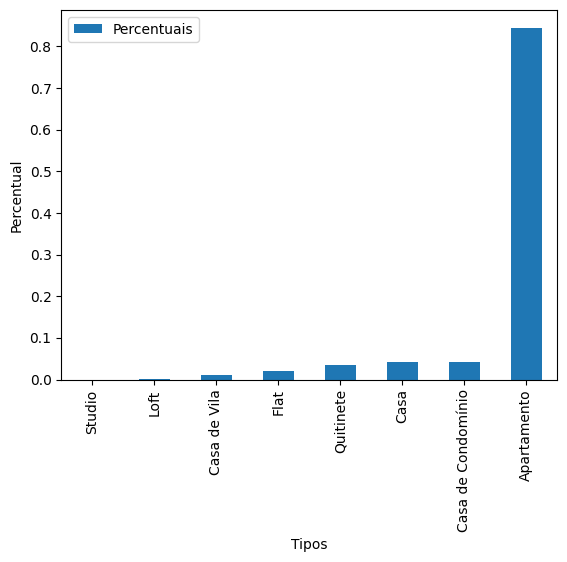

In [17]:
df_percentual_tipo.plot(kind='bar', xlabel = 'Tipos', ylabel = 'Percentual')

In [18]:
# Selecionando apenas imóveis do tipo apartamento

df = df.query('Tipo == "Apartamento"')
display(df)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


<Axes: xlabel='Preço do aluguel', ylabel='Bairro'>

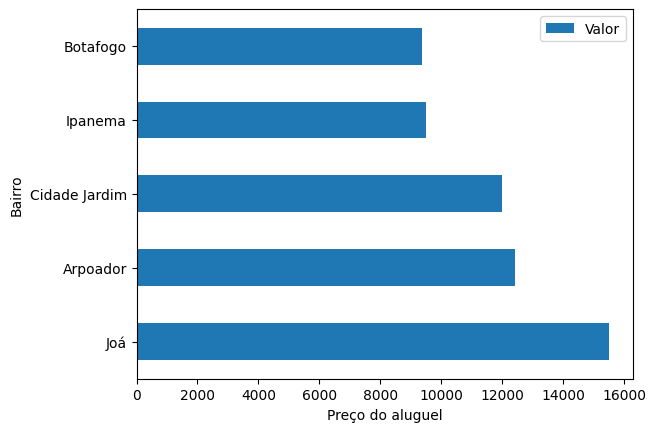

In [19]:
# 1) Calcular a média de quartos por apartamento;
df['Quartos'].mean()

# 2) Conferir quantos bairros únicos existem na nossa base de dados;
len(df['Bairro'].unique())

# 3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;
df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False)

# 4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.
df_desejado = df.groupby('Bairro')[['Valor']].mean().sort_values('Valor', ascending=False).head(5)

df_desejado.plot(kind='barh', xlabel = 'Preço do aluguel')

In [20]:
df.isnull().sum()

df = df.fillna(0)

In [21]:
indices_dos_registros_a_remover = df.query('Valor == 0 | Condominio == 0').index

df.drop(indices_dos_registros_a_remover, axis = 0, inplace= True) # 0 = linhas e 1 = colunas

df.head()

#df.drop('Tipo', axis = 1, inplace=True)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0


In [22]:
# Avaliando imóveis em cenários específicos

# 1) Apto com 1 quarto e aluguel menor que R$ 1200,00
df_1 = df[(df['Quartos'] == 1) & (df['Valor'] < 1200)]
#df_1_1 = df.query('Quartos == 1 & Valor < 1200')


In [23]:
# 2) Apto com pelo menos 2 quartos, aluguel menor que R$ 3000,00 e área maior que 70 m^2
df_2 = df[(df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)]

display(df_2)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,0.0
36,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,0.0
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0


In [24]:
df.to_csv('dados_apartamentos.csv', index=False, sep=';')

In [25]:
pd.read_csv('dados_apartamentos.csv', delimiter=';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
18775,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
18777,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [26]:
'''
1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".
'''

df_alunos = pd.read_csv('alunos.csv')

In [27]:
# 1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

df_alunos.isnull().sum() # Há 6 notas NA
df_alunos.fillna(0, inplace=True)

display(df_alunos)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


In [28]:
# 2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

indices = (df_alunos[(df_alunos['Nome'] == 'Alice') | (df_alunos['Nome'] == 'Carlos')]).index

df_alunos.drop(indices, axis=0, inplace=True)

display(df_alunos)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [29]:
# 3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

#df_alunos.info()

df_alunos_aprovados = df_alunos.query('Aprovado == True')

display(df_alunos_aprovados)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [30]:
# 4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv"
df_alunos_aprovados.to_csv('alunos_aprovados.csv', index=False)
pd.read_csv('alunos_aprovados.csv')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


In [36]:
dados = pd.read_csv('aluguel.csv', delimiter=';')
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados['Valor_por_ano'] = dados['Valor_por_mes']*12 + dados['IPTU']

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


In [ ]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + " com " + \
                    dados['Quartos'].astype(str) + ' quarto(s) ' + \
                    ' e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'

dados.head()

0    Quitinete em Copacabana com 1 quarto(s)  e 0 v...
1    Casa em Jardim Botânico com 2 quarto(s)  e 0 v...
2    Conjunto Comercial/Sala em Barra da Tijuca com...
3    Apartamento em Centro com 1 quarto(s)  e 0 vag...
4    Apartamento em Higienópolis com 1 quarto(s)  e...
Name: Descricao, dtype: object

In [49]:
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')

dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não


In [52]:
dados.to_csv('dados_completos.csv', index=False, sep=';')
pd.read_csv('dados_completos.csv', sep=';')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e...,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1150.0,13825.0,Quitinete em Centro com 0 quarto(s) e 0 vaga(...,Não
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2600.0,31240.0,Apartamento em Jacarepaguá com 3 quarto(s) e ...,Sim
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1909.0,22945.0,Apartamento em São Francisco Xavier com 2 quar...,Não
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN,3760.0,NaN,Apartamento em Leblon com 2 quarto(s) e 0 vag...,Não


In [ ]:
'''
1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.

2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
False: caso o aluno esteja reprovado (nota final deve ser menor que 6).

4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.
'''

In [56]:
# 1) Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada "Pontos_extras" que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.
# 2) Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

df_alunos.head()

df_alunos['Pontos_extras'] = df_alunos['Notas']*0.4 
df_alunos['Notas_finais'] = df_alunos['Pontos_extras'] + df_alunos['Notas']

display(df_alunos)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,7.0,True,2.8,9.8
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3


In [58]:
'''
3) Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora. Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
False: caso o aluno esteja reprovado (nota final deve ser menor que 6).
'''

df_alunos['Aprovados_final'] = df_alunos['Notas_finais'].apply(lambda x: True if x >= 6 else False)

display(df_alunos)

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,7.0,True,2.8,9.8,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


In [59]:
# 4) Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

df_alunos.query('Aprovado == False & Aprovados_final == True')

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovados_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True
